<div style="text-align: right">Adam Lyon, 11 Nov 2015</div> 
# Movie of muons going around ring 

In [125]:
# Tomorrow's notebook
from IPython.display import FileLink
FileLink("2015-11-12-al-gm2-movie-muons.ipynb")

/Users/lyon/dataAnalysisPlatform/Documents/Paraview/develop/2015-11-12-al-gm2-movie-muons.ipynb

The ultimate goal is to make a movie of a muon going around the ring with a rotating arrow pointing in the direction of spin. I think to do this I need to figure out the following...

1. How to make a movie with the camera going around the ring, looking from the side (should be easy, since camera points towards the center).
1. Movie of camera pointing down (harder, because the pointing changes)
1. Moving going around the inside of the ring (much harder)

Using `/Users/lyon/Development/g-2/projects/20150529/try/muonMovie`

## Movie going around edge of ring looking inward

Loading `gm2ring.vtm`. See state file `state/start.pvsm` .

Bring up the animation view. Add a camera item and select "orbit". You'll see a dialog box...

<img  src="BLK5TPKUDYI4IIEA0LWHUEOCIFQA1540.png"/>

Explanation is on page 123 of the community ParaView guide.
- **Center** is the center of the bounds of the selected objects and is the center of revolution
- **Normal** defines the normal to the plan of revolution (and defines the up direction for the camera image)
- **Origin** is the current camera position (where the orbit starts and stops)

So if you just take the defaults, you get...

<img src="figs/one.gif"/>

By the way, to make that movie I wrote out the animation as png's and converted them to an animated gif with,
```bash
ffmpeg -i one.%04d.png one.gif
```

Can we figure out a way to see where the camera is pointing?

If you double-click on the camera track in the animation view, you can see the camera path.

<img  src="IHWFP8Y5NRAG1UPT36K7JY9XBIVQ21V5.png"/>

Comparing values,

<img  src="UNK191VWY6U6B3PSXX32Q5PT1Q7W2ECK.png"/>

So the first point matches the origin in the orbit widget!

There's only one focus entry,

<img  src="BX3SWJ0BS1LXGYP9XVLXISF9JR3WY79M.png"/>

And that matches the orbit center.

And the up direction...

<img  src="E13T6JGQAYIU250BSJN9S6RAK8RFKDJY.png"/>

And that matches the normal

So I set a red sphere at the center of rotation (focus above, same as orbit center). The true center of the ring $(0,0,0)$ is the blue sphere. 

<img src="figs/two.gif" width="500px">

The red dot never moves! That's the center of rotation! It's whatever the camera was pointing at when I started the animation. 

If I do -Z so I'm looking from the side, that will satisfy goal #1

<img src="figs/three.gif" width="400" />

Ok - not very exciting

## Ring rotating looking at it downward towards the center

Ok - I do -Y and now I'm looking down on the ring. So if I hit orbit, it does the wrong thing, because to make the ring spin in fact the camera position itself does not move. The NORMAL moves (what is up).

So, hit -Y and do camera adjustment. Note that I'm not over the center because the bounding box center is not at $(0,0,0)$. Set the position to $(0, 50000, 0)$ and the focus to $(0,0,0)$. Note the normal (view up) is $(0,0,1)$, because $+z$ is up for the camera. It's the view up (or normal) that we want to animate. Try changing the Roll by $90^{\circ}$. 

| Roll | View up |
|------|---------|
|  0   |  0,0,1 |
| $+90^{\circ}$ | -1,0,0 |
| $+90^{\circ}$ | 0,0,-1|
| $+90^{\circ}$ | 1,0,0 |


Ok - so let's try **interpolate camera**. Make 40 frames starting 1 to 40. Add new keyframes in the camera track at 10, 20, and 30 frames and put in the numbers above. You'll get what you want!

<img src="figs/four.gif" width="600px">

It works!

Now go back to -Y, adjust the position like above. Now do $-60^{\circ}$ elevation change. You'll end up with

<img  src="OE53SUDKPT89WEVWGRUV20QGRO2GFEXY.png"/>

Now Roll again $90^{\circ}$ and make the table. -- **NOPE** - Since the plane is now tilted, the roll/elevation/azimuth no longer work. We need to do these things with the original plane.

Need paper to figure that out! State saved in `state/angledPlane.pvsm`

I don't really need to spend more time on this one, since it doesn't really have a use case.

Note that you can script some of this in Python. You can set up the animation, but the trace facility doesn't seem to capture changing or adding interpolated points, etc...

```python
renderView1 = GetActiveViewOrCreate('RenderView')
cameraAnimationCue1 = GetCameraTrack(view=renderView1)

# create a key frame
keyFrame8253 = CameraKeyFrame()
keyFrame8253.Position = [883.675048828125, -42734.70081212228, -280.780029296875]
keyFrame8253.FocalPoint = [883.675048828125, 0.0, -280.780029296875]
keyFrame8253.ViewUp = [0.0, 0.0, 1.0]
keyFrame8253.ParallelScale = 11060.554456935406
keyFrame8253.PositionPathPoints = [0.0, -500.0, 0.0, 293.8926261462365, -404.50849718747367, 0.0, 475.52825814757665, -154.50849718747372, 0.0, 475.52825814757665, 154.5084971874736, 0.0, 293.89262614623647, 404.5084971874735, 0.0, 8.526512829121202e-14, 499.99999999999966, 0.0, -293.89262614623624, 404.50849718747344, 0.0, -475.52825814757625, 154.50849718747367, 0.0, -475.52825814757625, -154.50849718747338, 0.0, -293.8926261462363, -404.50849718747304, 0.0]
keyFrame8253.FocalPathPoints = [0.0, 0.0, 0.0]
keyFrame8253.ClosedPositionPath = 1

# create a key frame
keyFrame8254 = CameraKeyFrame()
keyFrame8254.KeyTime = 1.0
keyFrame8254.Position = [883.675048828125, -42734.70081212228, -280.780029296875]
keyFrame8254.FocalPoint = [883.675048828125, 0.0, -280.780029296875]
keyFrame8254.ViewUp = [0.0, 0.0, 1.0]
keyFrame8254.ParallelScale = 11060.554456935406

# initialize the animation track
cameraAnimationCue1.KeyFrames = [keyFrame8253, keyFrame8254]

# get animation scene
animationScene1 = GetAnimationScene()

animationScene1.Play()
```

## Going around the ring from a little bit above

Let's try to find a good starting place - first, what's the magic radius? It's 7112 mm. The below is from doing -Y .

<img  src="L39M4V17989E9CT8MFWL6XHWBUQ20524.png"/>

So we can start at $( R_{\text{magic}}, 0, 0)$. The focal point should be a position tangential to that point that facilitates clockwise motion. Camera normal should be $(0,1,0)$. So the first focal point should be something like $(R_{\text{magic}}, 0, R_{\text{magic}})$.  

So, if we do the corners... (where R = $R_{\text{magic}}$)

| Angle on ring | Camera Position | Focal Point  |
|---------------|-----------------|--------------|
|      0        |  R, 0,  0       |  R, 0,  R    |
|     90        |  0, 0,  R       | -R, 0,  R    |
|    180        | -R, 0,  0       | -R, 0, -R    |
|    270        |  0, 0, -R       |  R, 0, -R    |

Let's try it!

Let's start with a $y$ of around 200 to see above the ring.

It doesn't work because the camera is cutting across the ring. If you watch the axis arrows, you'll see that the right things are happening at the control points above, but not in between - the camera is cutting the corner. 

<img src="figs/five.gif" width="500px"/>

It would be nice to see where the camera is really going. Can I do that with a python track?

### Python animation track

You have to fill three methods, 
```python
def start_cue(self): pass

def tick(self): pass

def end_cue(self): pass
```

The `start_cue` runs once when hitting *play* or each time you hit single step. So you can't use it to initialize some counter. 

The `self` is an instance of [vtkPythonAnimationCue](http://www.paraview.org/ParaQ/Doc/Nightly/html/classvtkPythonAnimationCue.html), which itself is uninteresting, but it inherits from [vtkAnimationCue](http://www.vtk.org/doc/nightly/html/classvtkAnimationCue.html) which has a lot of stuff.

Here is what you can get from self...

```python
['AddObserver', 'BreakOnError', 'DebugOff', 'DebugOn', 'EnabledOff', 'EnabledOn', 'FastDelete', 'Finalize', 'GetAddressAsString', 'GetAnimationTime', 'GetClassName', 'GetClockTime', 'GetCommand', 'GetDebug', 'GetDeltaTime', 'GetEnabled', 'GetEndTime', 'GetGlobalWarningDisplay', 'GetMTime', 'GetReferenceCount', 'GetScript', 'GetStartTime', 'GetTimeMode', 'GlobalWarningDisplayOff', 'GlobalWarningDisplayOn', 'HasObserver', 'Initialize', 'InvokeEvent', 'IsA', 'IsTypeOf', 'Modified', 'NewInstance', 'PrintRevisions', 'Register', 'RemoveAllObservers', 'RemoveObserver', 'RemoveObservers', 'SafeDownCast', 'SetDebug', 'SetEnabled', 'SetEndTime', 'SetGlobalWarningDisplay', 'SetReferenceCount', 'SetScript', 'SetStartTime', 'SetTimeMode', 'SetTimeModeToNormalized', 'SetTimeModeToRelative', 'TIMEMODE_NORMALIZED', 'TIMEMODE_RELATIVE', 'Tick', 'TimeCodes', 'UnRegister', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__this__', '__vtkname__']
```

- `self.GetClockTime()` returns the clock time (not the time step).
- `self.GetAnimiationTime()` is the normalized time (0 at beginning, 1 at the end, and a fraction in between)
- `self.GetStartTime()` always seems to be 1.0
- `self.GetEndTime()` always seems to be zero

It's important to know how many time steps there are and the start and end times. Can we get that from the scene?



What I really want is the tick time. You'd think that would be easy.

For example,
```python
from paraview import simple

def start_cue(self): 
    print "Start ", self.GetStartTime()
    print "End ", self.GetEndTime()

    scene = simple.GetAnimationScene()
    print dir(scene)
    print "NFrames ", scene.NumberOfFrames
    print "StartTime ", scene.StartTime
    print "EndTime ", scene.EndTime
    print "AnimationTime ", scene.AnimationTime

def tick(self): 
    print "ClockTime ", self.GetClockTime()
    print "tick.AnimationTime ", self.GetAnimationTime()

def end_cue(self): pass
```

gives,

<img  src="HI2AFMUGS1UCX14HR0FWI3U73JXXSQEQ.png"/>

Now, can we see the camera position?

You can get the active view, and then see,
```python
['AlphaBitPlanes', 'AxesGrid', 'BackLightAzimuth', 'BackLightElevation', 'BackLightKBRatio', 'BackLightWarmth', 'Background', 'Background2', 'BackgroundTexture', 'CacheKey', 'Camera2DManipulators', 'Camera3DManipulators', 'CameraClippingRange', 'CameraFocalPoint', 'CameraParallelProjection', 'CameraParallelScale', 'CameraPosition', 'CameraViewAngle', 'CameraViewUp', 'CenterAxesVisibility', 'CenterOfRotation', 'CollectGeometryThreshold', 'CompressorConfig', 'DepthPeeling', 'EnableRenderOnInteraction', 'EyeAngle', 'FillLightAzimuth', 'FillLightElevation', 'FillLightKFRatio', 'FillLightWarmth', 'GetProperty', 'GetPropertyValue', 'HeadLightKHRatio', 'HeadLightWarmth', 'ImageReductionFactor', 'Initialize', 'InitializeFromProxy', 'InteractionMode', 'KeyLightAzimuth', 'KeyLightElevation', 'KeyLightIntensity', 'KeyLightWarmth', 'LODResolution', 'LODThreshold', 'LightAmbientColor', 'LightDiffuseColor', 'LightIntensity', 'LightSpecularColor', 'LightSwitch', 'LightType', 'ListProperties', 'MaintainLuminance', 'MaximumNumberOfPeels', 'MultiSamples', 'NonInteractiveRenderDelay', 'Observed', 'ObserverTag', 'OrientationAxesInteractivity', 'OrientationAxesLabelColor', 'OrientationAxesOutlineColor', 'OrientationAxesVisibility', 'Port', 'RemoteRenderThreshold', 'Representations', 'RotationFactor', 'SMProxy', 'ServerStereoType', 'SetPropertyWithName', 'ShowAnnotation', 'StencilCapable', 'StereoRender', 'StereoType', 'StillRenderImageReductionFactor', 'UseCache', 'UseGradientBackground', 'UseInteractiveRenderingForScreenshots', 'UseLight', 'UseOffscreenRendering', 'UseOffscreenRenderingForScreenshots', 'UseOutlineForLODRendering', 'UseTexturedBackground', 'ViewSize', 'ViewTime', '_Proxy__ConvertArgumentsAndCall', '_Proxy__GetActiveCamera', '_Proxy__LastAttrName', '_Proxy__Properties', '__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattr__', '__getattribute__', '__hash__', '__init__', '__iter__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_attribute']
```

### Displaying camera positions

Here's a little python animation track script to write out camera positions and focal points...

```python
from paraview import simple

def start_cue(self):
    self.outFile = open('/tmp/cam.csv', 'w')
    self.outFile.write("x, y, z, fx, fy, fz, time, progress, tick\n")
    self.tick = 0

def tick(self): 
    av = simple.GetActiveView()
    c = av.CameraPosition
    f = av.CameraFocalPoint
    o = "%s, %s, %s, %s, %s, %s, %s, %s, %s\n" % (c[0], c[1], c[2], f[0], f[1], f[2], 
                                                  self.GetClockTime(), self.GetAnimationTime(), self.tick)
    self.tick += 1                                              
    print o
    self.outFile.write(o)
    
 
def end_cue(self):
    self.outFile.close()
```

Let the whole animation run (single step won't work, because that will cause the `start_cue` to run for each step). Load the CSV file `/tmp/cam.csv` into ParaView, do a `TableToPoints` filter followed by a `Calculator` filter with,

<img  src="OWLSBWU1J0X4R2Q6Y23B7FAP89AGEAX6.png"/>

and finally a `Glyph` vector with arrows on the `f` vector, and you'll see...

<img  src="CTDMJDV11JA23CQO2DY87L7QQ4C7LEDK.png"/>

The little dots are the camera positions and the arrows point in the camera direction. Handy!

So it's pretty clear what's going on - the interpolation is cutting the corners. Let's make a python animation track that gets it right. Basically, we cut the circle with a radius of $R_{\text{magic}}$ into *NFrames* parts. Then we want to calculate the focal point - where to be looking.

<img  src="VJOEIBYNJNUI8D70W0K1PN4HXPVIQUEC.png"/>

$(x,y)$ is the camera point.
- $x = r \cos(\phi)$
- $y = r \sin(\phi)$

The focal point is tangential to the camera circle path - $(a,b)$

- $\psi = \phi + \pi/4$  (includes $\phi$)
- $h = r\sqrt{2}$
- $a = h \cos(\psi) = r\sqrt{2} \cos(\phi + \pi/4)$
- $b = h \sin(\psi) = r\sqrt{2} \sin(\phi + \pi/4)$


In [6]:
import numpy as np

In [115]:
r=7112.0
nframes = 41
phi = np.linspace(0, 2.0*np.pi, nframes)
x = r * np.cos(phi)
z = r * np.sin(phi)
y = phi*0.0+200
a = np.sqrt(2)*r*np.cos(phi+np.pi/4.0)
b = np.sqrt(2)*r*np.sin(phi+np.pi/4.0)

Does it look right?

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

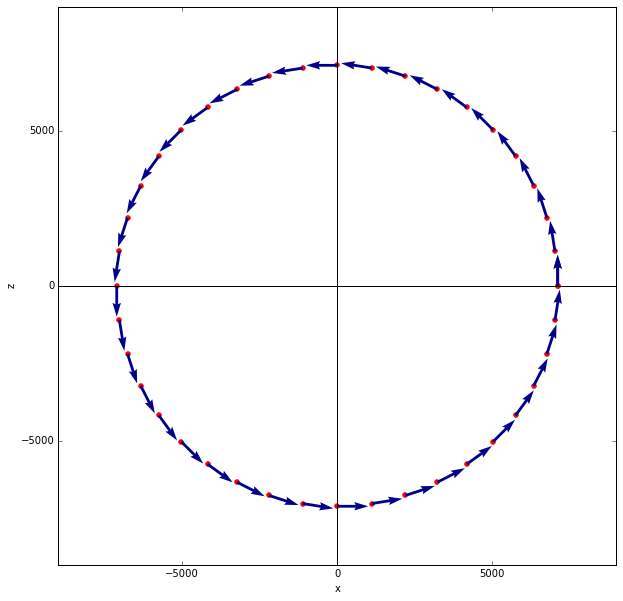

In [114]:
plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal', 'box')
plt.xlabel('x')
plt.ylabel('z')
plt.xlim(-9000.0, 9000.0)
plt.ylim(-9000.0, 9000.0)
plt.scatter(x, z, marker="o", color='red')
plt.quiver(x, z, a-x, b-z, width=0.005, color='darkblue')
plt.hlines(0, -9000, 9000)
plt.vlines(0, -9000, 9000)

I think we have it - how do we make a ParaView animation out of this?

If we do a path-based camera animation, we can preload the points. The format for `PositionPathPoints` and `FocalPathPoints` is `[x1, y1, z1, x2, y2, z2, ...`] . How do I make numpy do that? Here's how...
```python
np.dstack([x, y, z]).flatten().tolist()
```

Following a trace that I made, I think we do the following in a python macro...

```python
import numpy as np

r=7112.0
nframes = 41
phi = np.linspace(0, 2.0*np.pi, nframes)
x = r * np.cos(phi)
z = r * np.sin(phi)
y = phi*0.0+200
a = np.sqrt(2)*r*np.cos(phi+np.pi/4.0)
b = np.sqrt(2)*r*np.sin(phi+np.pi/4.0)

renderView1 = GetActiveViewOrCreate('RenderView')
cameraAnimationCue1 = GetCameraTrack(view=renderView1)
key1 = CameraKeyFrame()
key1.Position = [x[0], y[0], z[0]]
key1.FocalPoint = [a[0], y[0], b[0]]
key1.ViewUp = [0.0, 1.0, 0.0]
key1.ParallelScale = 11060.0
key1.PositionPathPoints = np.dstack([x,y,z]).flatten().tolist()
key1.FocalPathPoints = np.dstack([a,y,b]).flatten().tolist()
key1.ClosedPositionPath = 0 # Must be zero or else get nan's

key2 = CameraKeyFrame()   # Must have the end point
key2.KeyTime = 1.0
key2.Position = key1.Position
key2.FocalPoint = key1.FocalPoint
key2.ViewUp = key1.ViewUp
key2.ParallelScale = key1.ParallelScale

cameraAnimationCue1.Mode = 'Path-based'
cameraAnimationCue1.KeyFrames = [key1, key2]
```


Trying it out, I get

<img  src="OXBXD8THJ575GFMGBPADU390U2IKY15F.png"/>

Let's run the animation. Note that I'm now converting the png's with,
```bash
ffmpeg -i six.%04d.png -f gif - | gifsicle --optimize=3 --delay=10 > six.gif
```
`gifsicle` comes from brew. See https://gist.github.com/dergachev/4627207

<img src='figs/six.gif' />

Things to make better - not very smooth - do more animation frames. Not using all of the screen. Maybe make $y=100$ or tilt the focal point down a little.

**Done for today, see tomorrow's notebook**

In [126]:
FileLink("2015-11-12-al-gm2-movie-muons.ipynb")

/Users/lyon/dataAnalysisPlatform/Documents/Paraview/develop/2015-11-12-al-gm2-movie-muons.ipynb